In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import datetime

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [ ]:
df_train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [ ]:
df_test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [ ]:
df_train.shape

(27321, 80)

In [ ]:
df_test.shape

(11709, 80)

In [ ]:
len(set(df_train['UID']).intersection(set(df_test['UID'])))

123

In [ ]:
df_train.dtypes

UID              int64
BLOCKID        float64
SUMLEVEL         int64
COUNTYID         int64
STATEID          int64
                ...   
pct_own        float64
married        float64
married_snp    float64
separated      float64
divorced       float64
Length: 80, dtype: object

<Axes: >

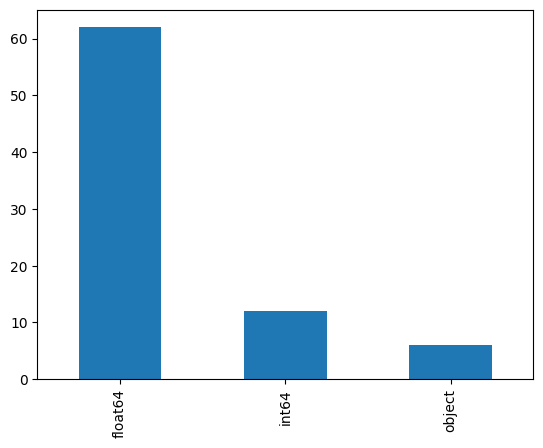

In [ ]:
df_train.dtypes.value_counts().plot(kind='bar')

In [ ]:
df_train.describe(include='O')

,state,state_ab,city,place,type,primary
count,27321,27321,27321,27321,27321,27321
unique,52,52,6916,9912,6,1
top,California,CA,Chicago,New York City,City,tract
freq,2926,2926,294,490,15237,27321


In [ ]:
#This flag will help us split the data back later
df_train['split']= 'Train'
df_test['split']= 'Test'

In [ ]:
df_combined=df_train.append(df_test, ignore_index=True)
df_combined.head()

<ipython-input-15-bb661d45caa3>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined=df_train.append(df_test, ignore_index=True)


,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,Train


In [ ]:
df_combined.tail()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split
39025,238088,NaN,140,105,12,Florida,FL,Lakeland,Crystal Springs,City,...,59.58333,23.23426,699.33353,2914.0,0.93121,0.65969,0.02135,0.02135,0.08780,Test
39026,242811,NaN,140,31,17,Illinois,IL,Chicago,Chicago City,Village,...,32.83333,20.24698,306.63915,1191.0,0.33122,0.42882,0.07781,0.02829,0.05305,Test
39027,250127,NaN,140,9,25,Massachusetts,MA,Lawrence,Methuen Town City,City,...,43.66667,23.17995,900.13903,3723.0,0.84372,0.50269,0.00108,0.00108,0.07294,Test
39028,241096,NaN,140,27,19,Iowa,IA,Carroll,Carroll City,City,...,48.16667,24.84209,693.82905,3213.0,0.83330,0.66699,0.02738,0.00000,0.04694,Test
39029,287763,NaN,140,453,48,Texas,TX,Austin,Sunset Valley City,Town,...,35.41667,20.68049,559.30291,2047.0,0.52587,0.51922,0.08066,0.02520,0.10586,Test


In [ ]:
df_combined.shape

(39030, 81)

In [ ]:
df_combined.isna().sum()

UID                0
BLOCKID        39030
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
married          275
married_snp      275
separated        275
divorced         275
split              0
Length: 81, dtype: int64

In [ ]:
# Fill rate of the variables -> (1- missing %)
1-df_combined.isna().sum()/len(df_combined)

UID            1.000000
BLOCKID        0.000000
SUMLEVEL       1.000000
COUNTYID       1.000000
STATEID        1.000000
                 ...   
married        0.992954
married_snp    0.992954
separated      0.992954
divorced       0.992954
split          1.000000
Length: 81, dtype: float64

In [ ]:
# BlOCKID is completly missing or Null in both train and test data. So we will drop BLOCKID feature.
df_combined.drop(columns =['BLOCKID'], axis=1, inplace=True)

In [ ]:
df_combined.isna().sum()/len(df_combined)*100

UID            0.000000
SUMLEVEL       0.000000
COUNTYID       0.000000
STATEID        0.000000
state          0.000000
                 ...   
married        0.704586
married_snp    0.704586
separated      0.704586
divorced       0.704586
split          0.000000
Length: 80, dtype: float64

In [ ]:
# Missing value greater than zero
col_check=df_combined.isna().sum().to_frame().reset_index()
null_col=col_check[col_check[0]>0]['index'].tolist()
null_col

['rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_samples',
 'pct_own',
 'married'

In [ ]:
#If the feature have less than 8 unique value then I am consdering as categorical else it will be continuous
for i in null_col:
    print(i)
    if df_combined[i].nunique()>8:      #Continuous data
        df_combined[i].fillna(df_combined[i].median(),inplace=True)    #Bcz median is not impacted by outlier
    else:df_combined[i].fillna(df_combined[i].mode()[0],inplace=True)  #Categorical data

rent_mean
rent_median
rent_stdev
rent_sample_weight
rent_samples
rent_gt_10
rent_gt_15
rent_gt_20
rent_gt_25
rent_gt_30
rent_gt_35
rent_gt_40
rent_gt_50
hi_mean
hi_median
hi_stdev
hi_sample_weight
hi_samples
family_mean
family_median
family_stdev
family_sample_weight
family_samples
hc_mortgage_mean
hc_mortgage_median
hc_mortgage_stdev
hc_mortgage_sample_weight
hc_mortgage_samples
hc_mean
hc_median
hc_stdev
hc_samples
hc_sample_weight
home_equity_second_mortgage
second_mortgage
home_equity
debt
second_mortgage_cdf
home_equity_cdf
debt_cdf
hs_degree
hs_degree_male
hs_degree_female
male_age_mean
male_age_median
male_age_stdev
male_age_sample_weight
male_age_samples
female_age_mean
female_age_median
female_age_stdev
female_age_sample_weight
female_age_samples
pct_own
married
married_snp
separated
divorced


In [ ]:
df_combined.isna().sum()/len(df_combined)*100

UID            0.0
SUMLEVEL       0.0
COUNTYID       0.0
STATEID        0.0
state          0.0
              ... 
married        0.0
married_snp    0.0
separated      0.0
divorced       0.0
split          0.0
Length: 80, dtype: float64

In [ ]:
df_combined.shape

(39030, 80)

In [ ]:
# Drop duplicate observations
df_combined.drop_duplicates(inplace=True)
df_combined.shape

(38838, 80)

In [ ]:
top_2500_loc=df_train[(df_train['second_mortgage']<0.50) &
                      (df_train['pct_own']>0.10) ].sort_values(by='second_mortgage', ascending=False).head(2500)

In [ ]:
top_2500_loc=top_2500_loc[['state','city','state_ab','place','lat','lng']]
top_2500_loc.head()

,state,city,state_ab,place,lat,lng
11980,Massachusetts,Worcester,MA,Worcester City,42.254262,-71.800347
26018,New York,Corona,NY,Harbor Hills,40.751809,-73.853582
7829,Maryland,Glen Burnie,MD,Glen Burnie,39.127273,-76.635265
2077,Florida,Tampa,FL,Egypt Lake-leto,28.029063,-82.495395
1701,Illinois,Chicago,IL,Lincolnwood,41.967289,-87.652434


In [ ]:
!pip install geopandas
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(top_2500_loc, geometry=gpd.points_from_xy(x=top_2500_loc.lng, y=top_2500_loc.lat))
gdf

,state,city,state_ab,place,lat,lng,geometry
11980,Massachusetts,Worcester,MA,Worcester City,42.254262,-71.800347,POINT (-71.80035 42.25426)
26018,New York,Corona,NY,Harbor Hills,40.751809,-73.853582,POINT (-73.85358 40.75181)
7829,Maryland,Glen Burnie,MD,Glen Burnie,39.127273,-76.635265,POINT (-76.63526 39.12727)
2077,Florida,Tampa,FL,Egypt Lake-leto,28.029063,-82.495395,POINT (-82.49540 28.02906)
1701,Illinois,Chicago,IL,Lincolnwood,41.967289,-87.652434,POINT (-87.65243 41.96729)
...,...,...,...,...,...,...,...
17914,North Carolina,Raleigh,NC,Raleigh City,35.757135,-78.704288,POINT (-78.70429 35.75713)
5478,California,Marina Del Rey,CA,Marina Del Rey,33.983204,-118.466139,POINT (-118.46614 33.98320)
25642,Maryland,Baltimore,MD,Lochearn,39.353095,-76.733315,POINT (-76.73331 39.35310)
26671,Pennsylvania,Philadelphia,PA,Philadelphia City,40.039070,-75.125135,POINT (-75.12514 40.03907)


In [ ]:
#Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage
df_combined['bad_debt'] = df_combined['second_mortgage'] + df_combined['home_equity'] - df_combined['home_equity_second_mortgage']
df_combined.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train,0.09408
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train,0.04274
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train,0.09512
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train,0.01086
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,Train,0.05426


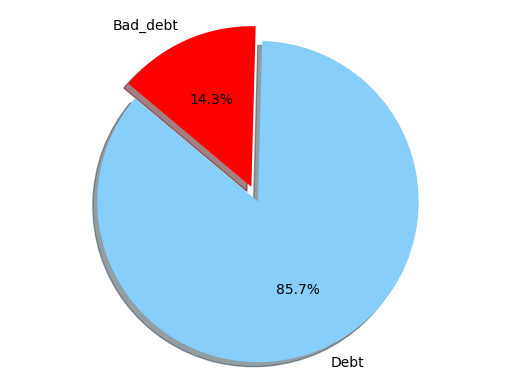

In [ ]:
import matplotlib.pyplot as plt
labels = 'Debt', 'Bad_debt'
sizes = [df_combined['debt'].mean()*100, df_combined['bad_debt'].mean()*100]
colors = [ 'lightskyblue','red']
explode = (0.1, 0)  # explode 1st slice

#Plot
plt.pie(sizes,explode=explode,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [ ]:
df_combined['good_debt']=df_combined['debt']-df_combined['bad_debt']
df_combined.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt,good_debt
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train,0.09408,0.43555
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train,0.04274,0.56581
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train,0.09512,0.63972
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train,0.01086,0.51628
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,Train,0.05426,0.46512


In [ ]:
df_combined.columns

Index(['UID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree',

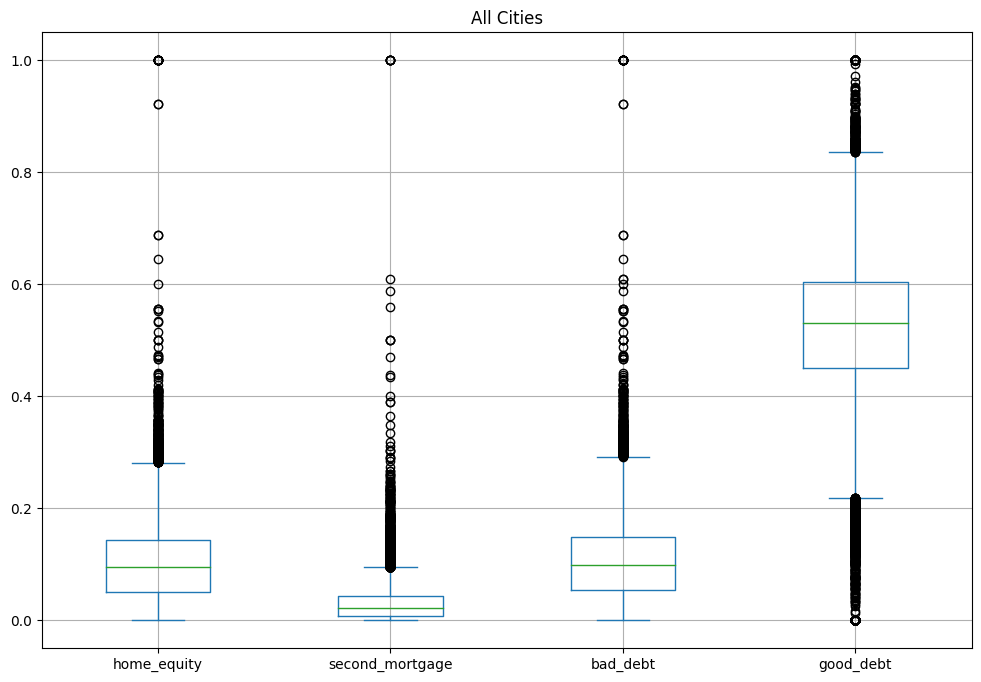

In [ ]:
all_cities = df_combined[['home_equity','second_mortgage','bad_debt', 'good_debt']]
all_cities.plot.box(figsize=(12,8),grid=True)
plt.title('All Cities')
plt.show()

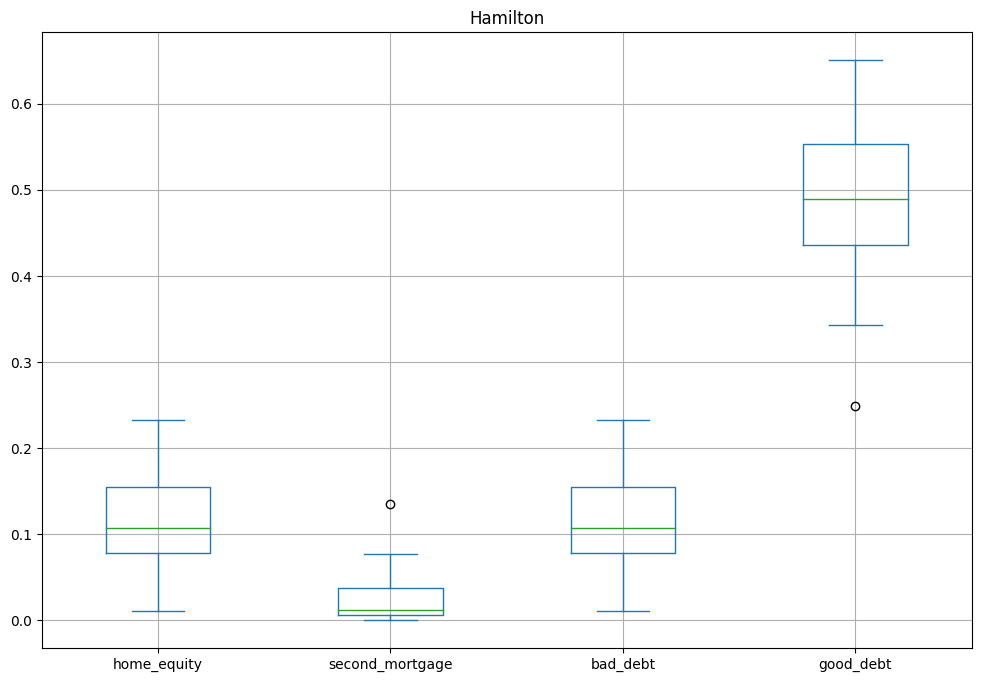

In [ ]:
hamilton = df_combined[df_combined['city']=='Hamilton']
hamilton = hamilton[['home_equity','second_mortgage','bad_debt', 'good_debt']]
hamilton.plot.box(figsize=(12,8),grid=True)
plt.title('Hamilton')
plt.show()

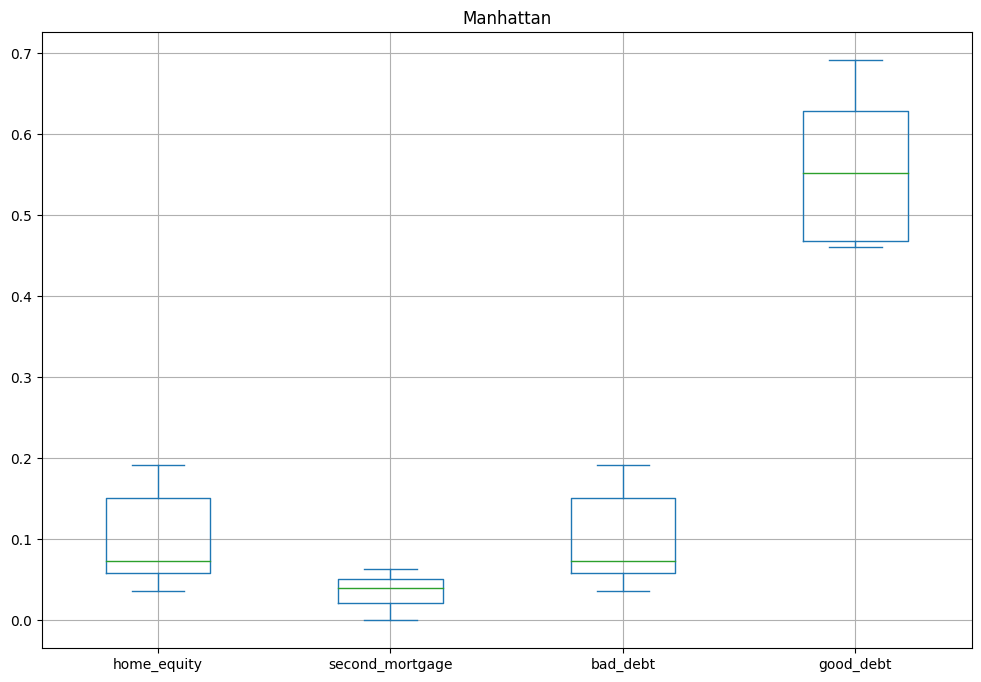

In [ ]:
Manhattan = df_combined[df_combined['city']=='Manhattan']
Manhattan = Manhattan[['home_equity','second_mortgage','bad_debt', 'good_debt']]
Manhattan.plot.box(figsize=(12,8),grid=True)
plt.title('Manhattan')
plt.show()

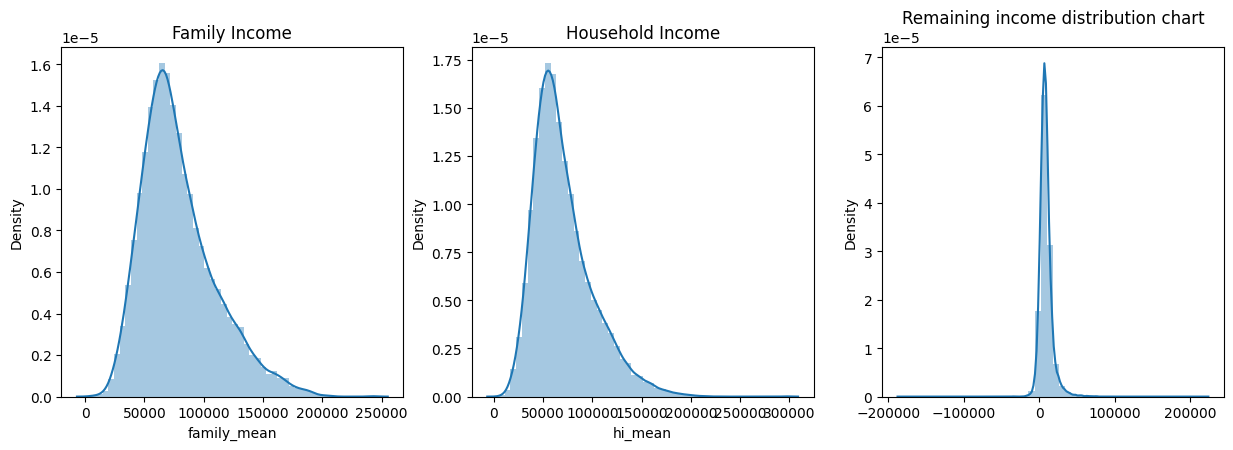

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.distplot(df_train['family_mean'])
plt.title('Family Income')
plt.subplot(2,3,2)
sns.distplot(df_train['hi_mean'])
plt.title('Household Income')
plt.subplot(2,3,3)
sns.distplot(df_train['family_mean']-df_train['hi_mean'])
plt.title('Remaining income distribution chart')
plt.show()

In [ ]:
df_combined['population_density'] = df_combined['pop']/df_combined['ALand']

In [ ]:
df_combined.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt,good_debt,population_density
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train,0.09408,0.43555,0.000026
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train,0.04274,0.56581,0.001687
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train,0.09512,0.63972,0.000099
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train,0.01086,0.51628,0.002442
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,Train,0.05426,0.46512,0.002207


In [ ]:
# Weighted average
# median_age=((male_age_median * male_pop)+(female_age_median*female_pop))/(male_pop+female_pop)
#           =((40*10)+(50*30))/40
#           =(400+1500)/40
#           =190/4
#           =47.5
df_combined['median_age']=((df_combined['male_age_median'] * df_combined['male_pop'])+(df_combined['female_age_median']*df_combined['female_pop']))/(df_combined['male_pop']+df_combined['female_pop'])

In [ ]:
df_combined.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,pct_own,married,married_snp,separated,divorced,split,bad_debt,good_debt,population_density,median_age
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,0.79046,0.57851,0.01882,0.01240,0.08770,Train,0.09408,0.43555,0.000026,44.667430
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,0.52483,0.34886,0.01426,0.01426,0.09030,Train,0.04274,0.56581,0.001687,34.722748
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,0.85331,0.64745,0.02830,0.01607,0.10657,Train,0.09512,0.63972,0.000099,41.774472
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,0.65037,0.47257,0.02021,0.02021,0.10106,Train,0.01086,0.51628,0.002442,49.879012
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,0.13046,0.12356,0.00000,0.00000,0.03109,Train,0.05426,0.46512,0.002207,21.965629


<Axes: xlabel='population_density', ylabel='Count'>

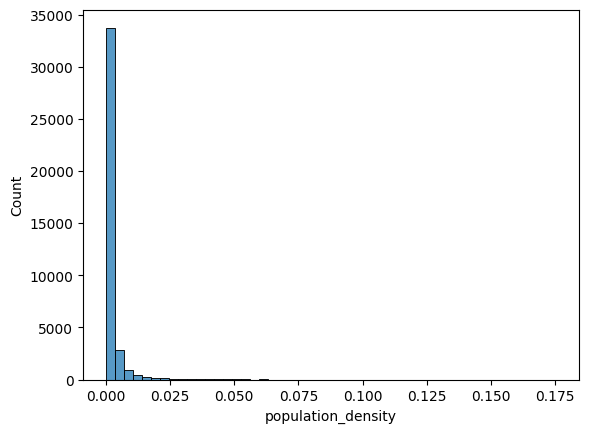

In [ ]:
sns.histplot(df_combined['population_density'], bins=50)

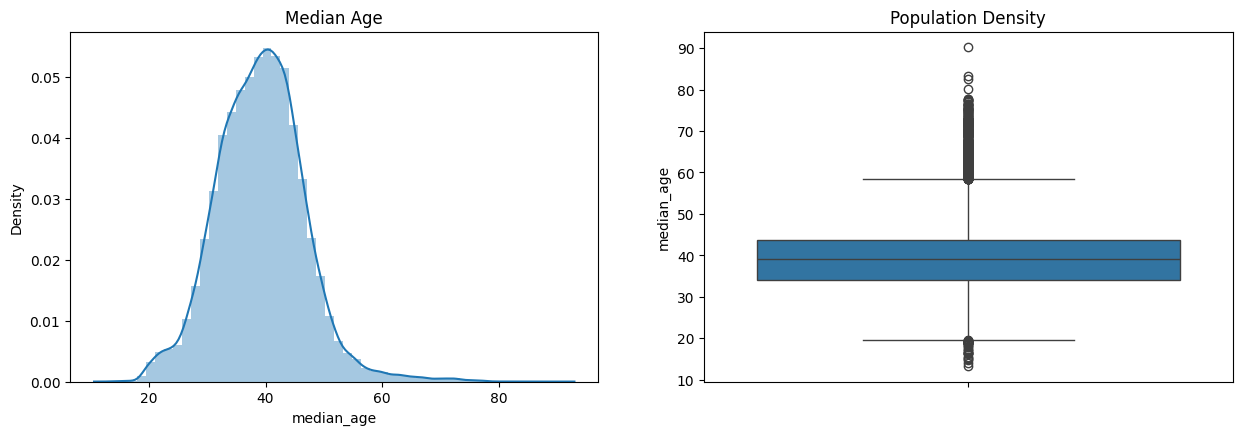

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df_combined['median_age'])
plt.title('Median Age')
plt.subplot(2,2,2)
sns.boxplot(df_combined['median_age'])
plt.title('Population Density')
plt.show()

In [ ]:
df_combined['pop_bins']=pd.cut(df_combined['pop'],bins=5,labels=['very low','low','medium','high','very high'])
df_combined['pop_bins'].value_counts()

very low     38472
low            348
medium          12
high             5
very high        1
Name: pop_bins, dtype: int64

In [ ]:
df_combined.groupby(by='pop_bins')[['married','separated','divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,38472,38472,38472
low,348,348,348
medium,12,12,12
high,5,5,5
very high,1,1,1


In [ ]:
df_combined.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.507647  0.526210  0.019163  0.013580  0.100263  0.094965
low        0.589247  0.601815  0.014929  0.010255  0.075192  0.069340
medium     0.617047  0.605765  0.011203  0.007745  0.071870  0.069090
high       0.570438  0.614130  0.010398  0.005520  0.050514  0.056690
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

<Figure size 1200x800 with 0 Axes>

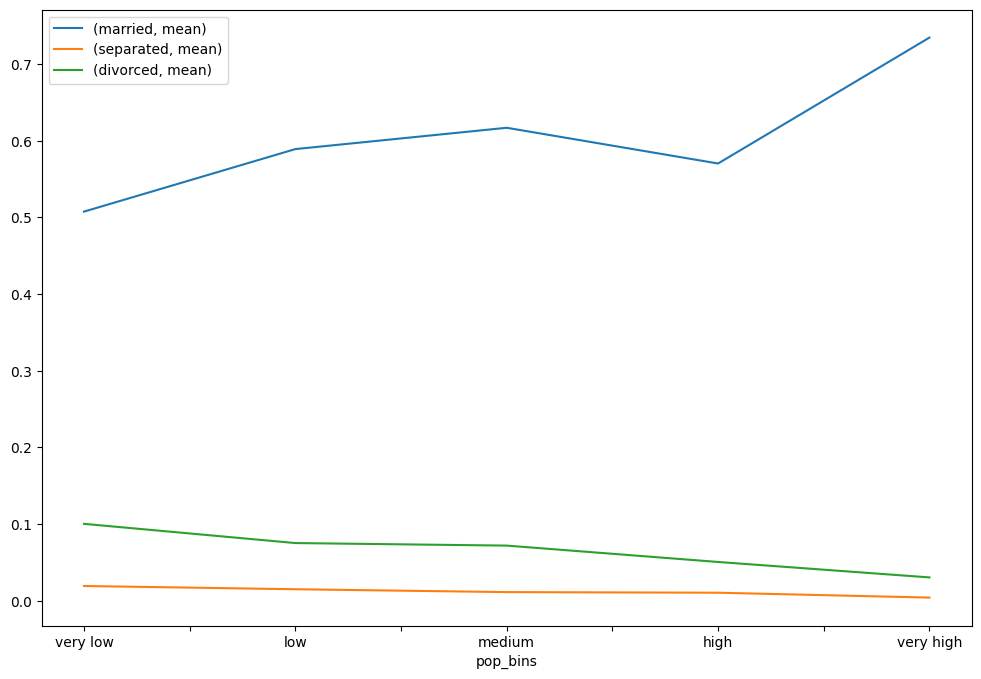

In [ ]:
plt.figure(figsize=(12,8))
pop_bin_married=df_combined.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(12,8))
plt.legend(loc='best')
plt.show()

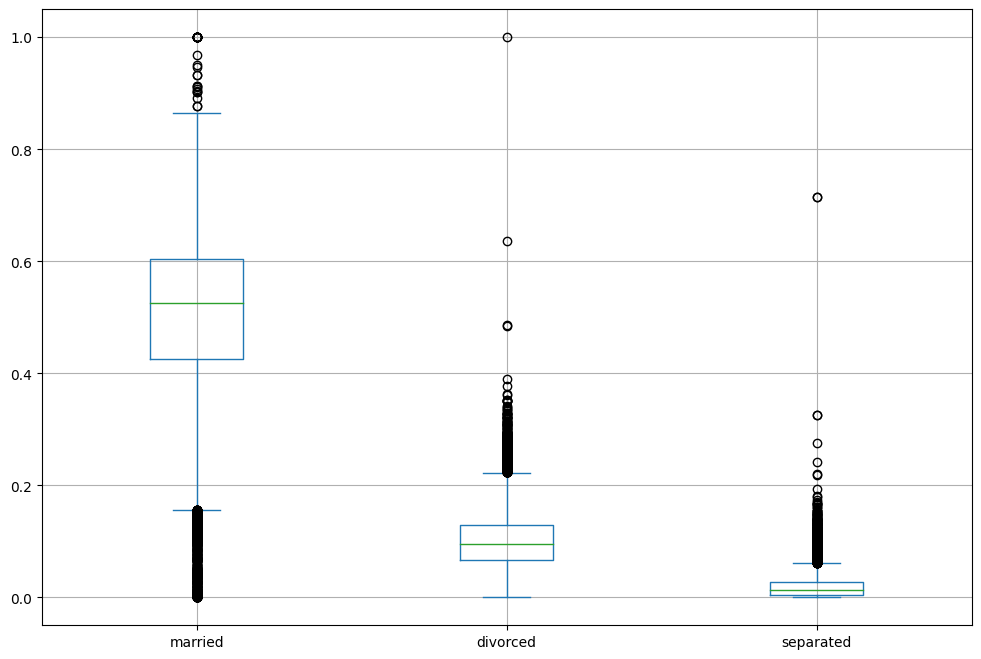

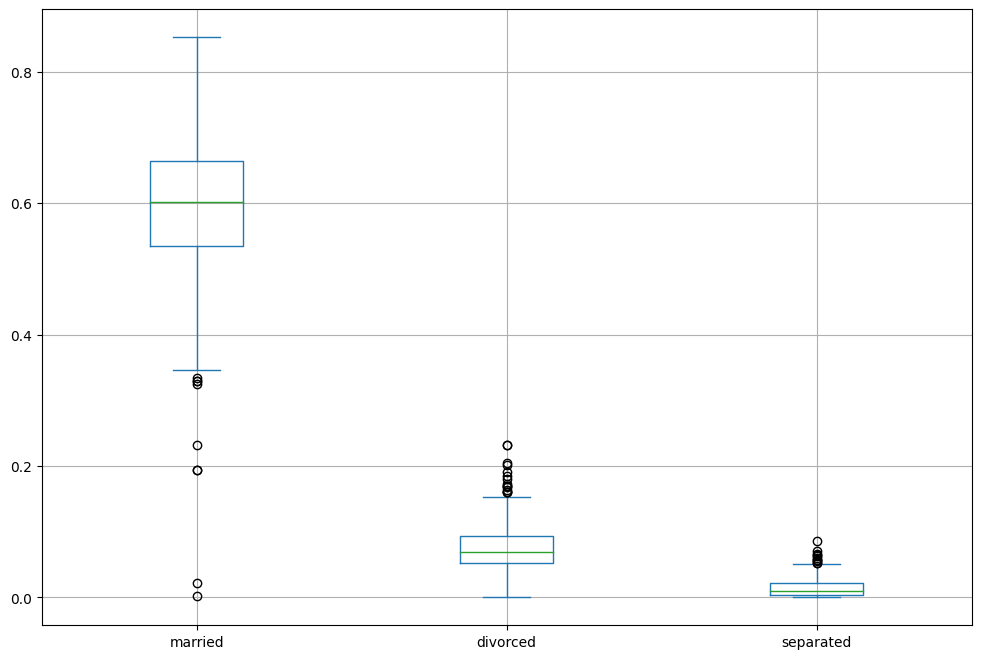

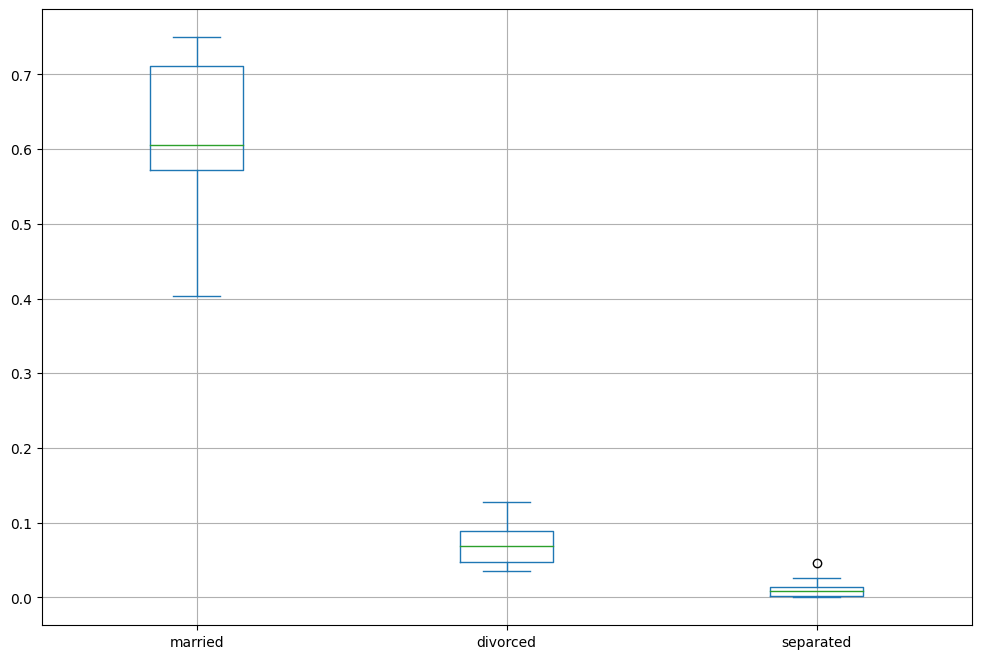

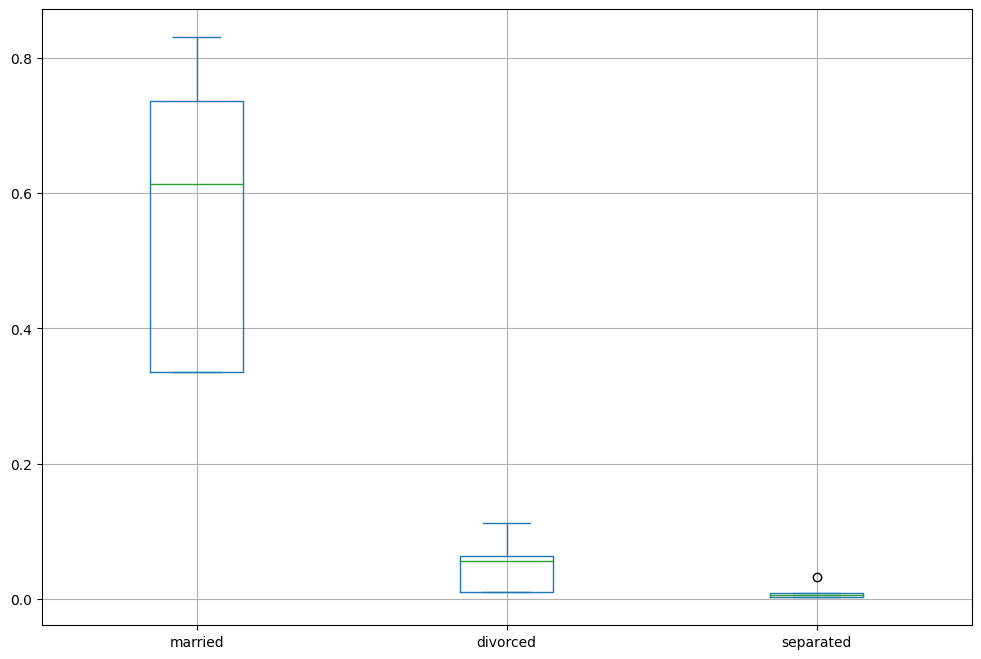

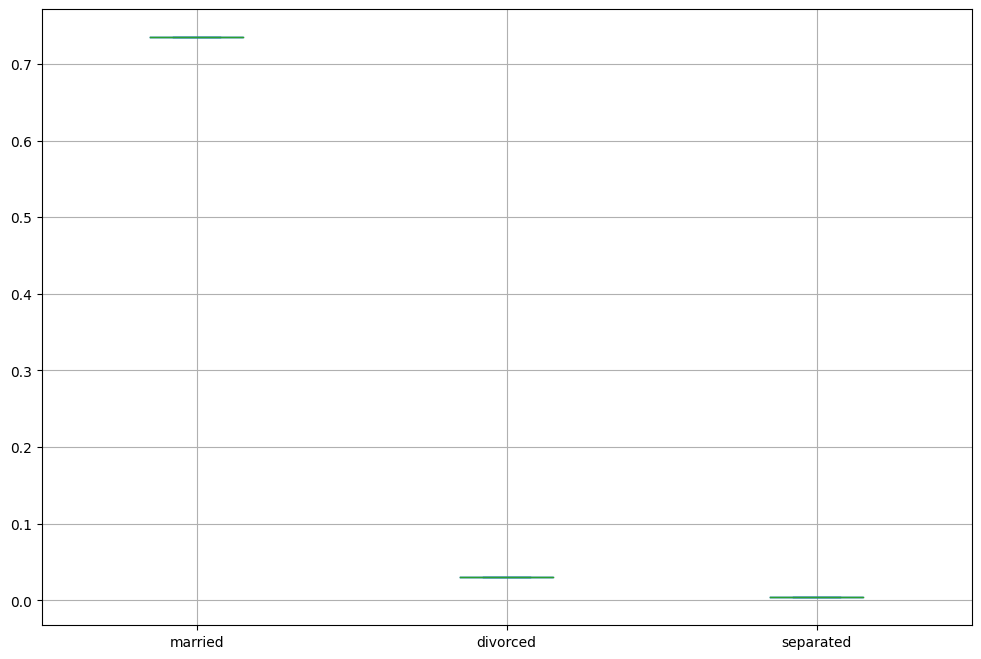

In [ ]:
df_combined.groupby(by='pop_bins')[['married','divorced', 'separated']].plot.box(figsize=(12,8),grid='True')
plt.show()

In [ ]:
rent_state_mean = df_combined.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

,mean
state,
Alabama,765.872557
Alaska,1190.093590
Arizona,1084.462392
Arkansas,716.544987
California,1465.019694


In [ ]:
income_state_mean=df_combined.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head()

,mean
state,
Alabama,65311.510962
Alaska,91911.137520
Arizona,73020.627940
Arkansas,64234.705963
California,87599.537172


In [ ]:
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']*100
rent_perc_of_income.head(10)

state
Alabama                 1.172646
Alaska                  1.294831
Arizona                 1.485145
Arkansas                1.115511
California              1.672406
Colorado                1.362639
Connecticut             1.272709
Delaware                1.311538
District of Columbia    1.357102
Florida                 1.576506
Name: mean, dtype: float64

In [ ]:
sum(df_combined['rent_mean'])/sum(df_combined['family_mean'])

0.013360285332548792

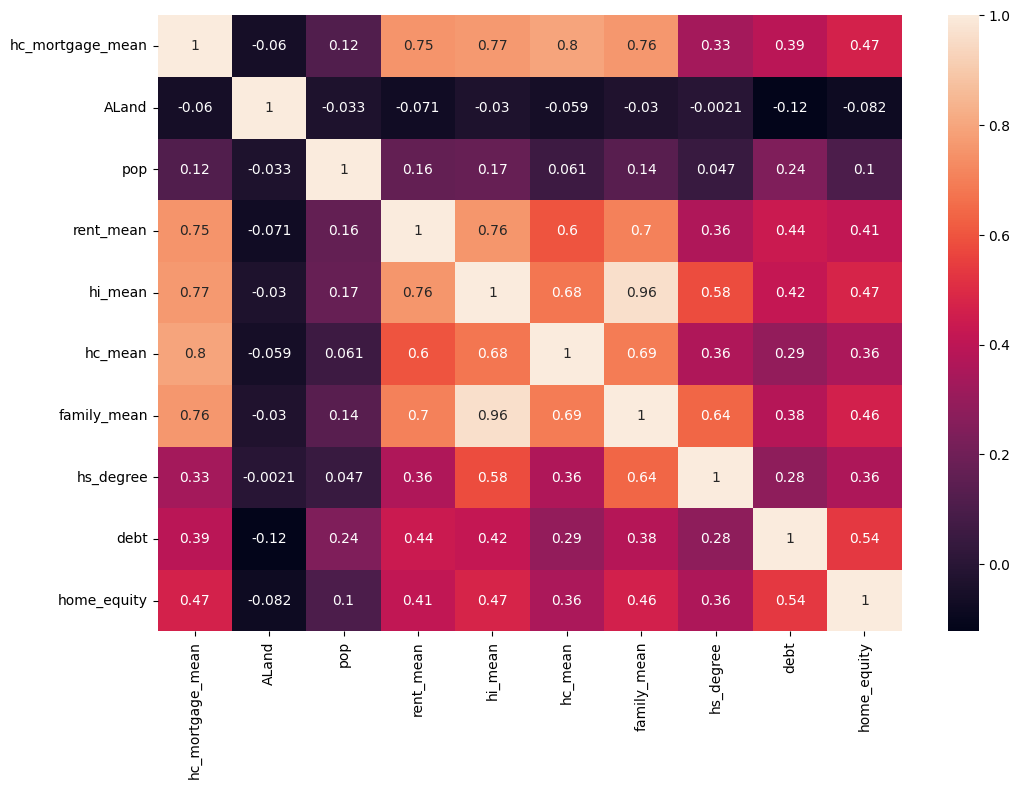

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df_combined[['hc_mortgage_mean','ALand','pop','rent_mean','hi_mean','hc_mean','family_mean',
                           'hs_degree','debt','home_equity']].corr(),annot=True)
plt.show()

In [ ]:
train = df_combined[df_combined['split'] == 'Train']
test = df_combined[df_combined['split'] == 'Test']

In [ ]:
train.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,married,married_snp,separated,divorced,split,bad_debt,good_debt,population_density,median_age,pop_bins
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,0.57851,0.01882,0.01240,0.08770,Train,0.09408,0.43555,0.000026,44.667430,very low
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,0.34886,0.01426,0.01426,0.09030,Train,0.04274,0.56581,0.001687,34.722748,very low
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,0.64745,0.02830,0.01607,0.10657,Train,0.09512,0.63972,0.000099,41.774472,very low
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,0.47257,0.02021,0.02021,0.10106,Train,0.01086,0.51628,0.002442,49.879012,very low
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,0.12356,0.00000,0.00000,0.03109,Train,0.05426,0.46512,0.002207,21.965629,very low


In [ ]:
test.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,married,married_snp,separated,divorced,split,bad_debt,good_debt,population_density,median_age,pop_bins
27321,255504,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,0.28217,0.05910,0.03813,0.14299,Test,0.07651,0.55973,0.001260,31.189053,very low
27322,252676,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,0.64221,0.02338,0.00000,0.13377,Test,0.14375,0.50380,0.000257,46.382991,very low
27323,276314,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,...,0.59961,0.01746,0.01358,0.10026,Test,0.06744,0.38651,0.000015,43.147420,very low
27324,248614,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,...,0.56953,0.05492,0.04694,0.12489,Test,0.01741,0.40174,0.000005,45.155104,very low
27325,286865,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,...,0.57620,0.01726,0.00588,0.16379,Test,0.03440,0.59748,0.000452,43.235983,very low


In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=e697f6f59057b35bc7203e9802e81645a880afbecca5244c9182ccd75b12ee5d
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
import numpy as np
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
UID,27321.0,257331.996303,21343.859725,220342.0,238816.000000,257220.000000,275818.000000,294334.00000
BLOCKID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUMLEVEL,27321.0,140.000000,0.000000,140.0,140.000000,140.000000,140.000000,140.00000
COUNTYID,27321.0,85.646426,98.333097,1.0,29.000000,63.000000,109.000000,840.00000
STATEID,27321.0,28.271806,16.392846,1.0,13.000000,28.000000,42.000000,72.00000
...,...,...,...,...,...,...,...,...
pct_own,27053.0,0.640434,0.226640,0.0,0.502780,0.690840,0.817460,1.00000
married,27130.0,0.508300,0.136860,0.0,0.425102,0.526665,0.605760,1.00000
married_snp,27130.0,0.047537,0.037640,0.0,0.020810,0.038840,0.065100,0.71429
separated,27130.0,0.019089,0.020796,0.0,0.004530,0.013460,0.027488,0.71429


In [ ]:
train.columns

Index(['UID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree',

In [ ]:
train['type'].unique()

array(['City', 'Urban', 'Town', 'CDP', 'Village', 'Borough'], dtype=object)

In [ ]:
type_dict={'type':{'City':1, 'Urban':2, 'Town':3, 'CDP':4, 'Village':5, 'Borough':6}}
train.replace(type_dict,inplace=True)

In [ ]:
test.replace(type_dict,inplace=True)

In [ ]:
train['type'].unique()

array([1, 2, 3, 4, 5, 6])

In [ ]:
test['type'].unique()

array([4, 1, 6, 3, 5, 2])

In [ ]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean','second_mortgage', 'home_equity', 'debt','hs_degree',
              'pct_own', 'married','separated', 'divorced']

In [ ]:
X_train = train[feature_cols]
y_train = train['hc_mortgage_mean']

In [ ]:
X_test = test[feature_cols]
y_test = test['hc_mortgage_mean']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score

In [ ]:
X_train.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,pct_own,married,separated,divorced
0,53,36,13346,1,5230,67994.14790,0.02077,0.08919,0.52963,0.89288,0.79046,0.57851,0.01240,0.08770
1,141,18,46616,1,2633,50670.10337,0.02222,0.04274,0.60855,0.90487,0.52483,0.34886,0.01426,0.09030
2,63,18,46122,1,6881,95262.51431,0.00000,0.09512,0.73484,0.94288,0.85331,0.64745,0.01607,0.10657
3,127,72,927,2,2700,56401.68133,0.01086,0.01086,0.52714,0.91500,0.65037,0.47257,0.02021,0.10106
4,161,20,66502,1,5637,54053.42396,0.05426,0.05426,0.51938,1.00000,0.13046,0.12356,0.00000,0.03109


In [ ]:
X_test.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,pct_own,married,separated,divorced
27321,163,26,48239,4,3417,53802.87122,0.06443,0.07651,0.63624,0.91047,0.70252,0.28217,0.03813,0.14299
27322,1,23,4210,1,3796,85642.22095,0.01175,0.14375,0.64755,0.94290,0.85128,0.64221,0.00000,0.13377
27323,15,42,14871,6,3944,65694.06582,0.01316,0.06497,0.45395,0.89238,0.81897,0.59961,0.01358,0.10026
27324,231,21,42633,1,2508,44156.38709,0.00995,0.01741,0.41915,0.60908,0.84609,0.56953,0.04694,0.12489
27325,355,48,78410,3,6230,123527.02420,0.00000,0.03440,0.63188,0.86297,0.79077,0.57620,0.00588,0.16379


In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred= lr.predict(X_test_scaled)

In [ ]:
r2_score(y_test,y_pred)

0.7308805268616411

In [ ]:
mean_absolute_error(y_test, y_pred)

235.0679226954647

In [ ]:
mean_squared_error(y_test, y_pred)

106208.92012522499

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

325.8971005167505

In [ ]:
r2_score(y_train, lr.predict(X_train_scaled))

0.734344756627955

In [ ]:
lr.coef_

array([ -28.50842455,  -21.7100607 ,  -22.98370175,  -57.43101333,
         -4.78426374,  558.7402445 ,   -0.55955638,   70.89657588,
         12.81271881, -113.18431746, -176.51983734,    8.10645154,
          5.24214879,  -55.79637445])

In [ ]:
X_train.columns

Index(['COUNTYID', 'STATEID', 'zip_code', 'type', 'pop', 'family_mean',
       'second_mortgage', 'home_equity', 'debt', 'hs_degree', 'pct_own',
       'married', 'separated', 'divorced'],
      dtype='object')

In [ ]:
state = train['STATEID'].unique()
state

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10])

In [ ]:
for i in [11,1,29]:
    print("State ID-",i)

    X_train_nation = train[train['COUNTYID'] == i][feature_cols]
    y_train_nation = train[train['COUNTYID'] == i]['hc_mortgage_mean']

    X_test_nation = test[test['COUNTYID'] == i][feature_cols]
    y_test_nation = test[test['COUNTYID'] == i]['hc_mortgage_mean']

    X_train_scaled_nation = sc.fit_transform(X_train_nation)
    X_test_scaled_nation = sc.fit_transform(X_test_nation)

    lr.fit(X_train_scaled_nation,y_train_nation)
    y_pred_nation = lr.predict(X_test_scaled_nation)

    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID- 11
Overall R2 score of linear regression model for state, 11 :- 0.7458953509562303
Overall RMSE of linear regression model for state, 11 :- 238.52276788095128


State ID- 1
Overall R2 score of linear regression model for state, 1 :- 0.8005640694449658
Overall RMSE of linear regression model for state, 1 :- 316.81404377799555


State ID- 29
Overall R2 score of linear regression model for state, 29 :- 0.7060596740519713
Overall RMSE of linear regression model for state, 29 :- 271.1048912505918




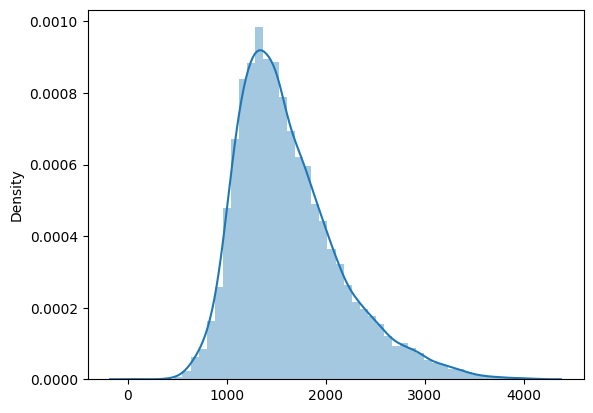

In [ ]:
sns.distplot(y_pred)
plt.show()